In [116]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn.gaussian_process as gp

In [117]:
def plot_gp(model, X_train, y_train, xlab="normalized [sodium borohydrate]", ylab="absorbance"):
    plt.scatter(X_train, y_train, label="Observations")

    if model is not None:
        X = np.linspace(start=0, stop=1, num=1_000).reshape(-1, 1)
        mean_prediction, std_prediction = model.predict(X, return_std=True)
    
        
        plt.plot(X, mean_prediction, label="Mean prediction")
        plt.fill_between(
            X.ravel(),
            mean_prediction - 1.96 * std_prediction,
            mean_prediction + 1.96 * std_prediction,
            alpha=0.5,
            label=r"95% confidence interval",
        )
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    _ = plt.title("Gaussian process regression")

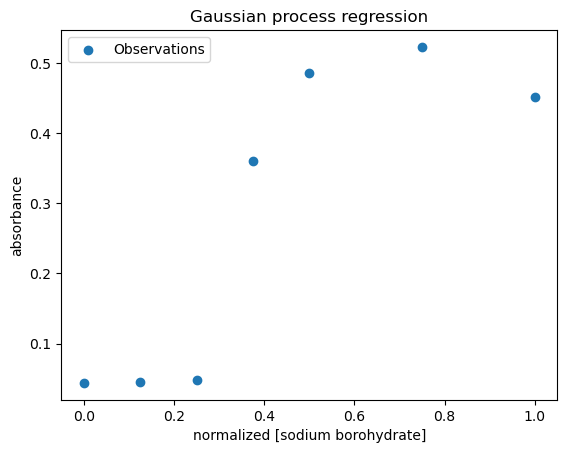

In [144]:
X = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.75, 1]).reshape(7,1)
y = np.array([0.044, 0.046, 0.048, 0.361, 0.486, 0.523, 0.452]).reshape(7,1)
plot_gp(None, X, y)

*links to GP kernel documentation*

[Matern kernel](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.Matern.html)

[RBF kernel](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html)

In [154]:
kernel = gp.kernels.RBF(length_scale=1.0, length_scale_bounds=(0.2, 1))
#kernel = 1 * gp.kernels.RBF(length_scale=1.0, length_scale_bounds=(0.2, 1))
#kernel = 1 * gp.kernels.Matern(length_scale=1.0, length_scale_bounds=(0.2, 1), nu=1.5)
#kernel = 1 * (gp.kernels.Matern(length_scale=1.0, length_scale_bounds=(0.2, 1), nu=1.5) + gp.kernels.WhiteKernel(noise_level=0.05**2, noise_level_bounds='fixed'))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
model.fit(X, y)
model.kernel_

RBF(length_scale=0.208)

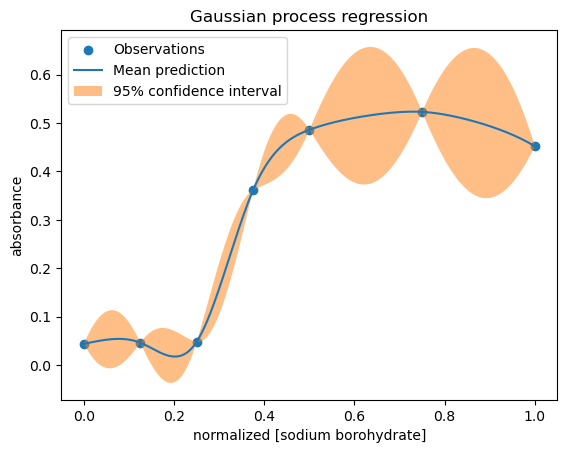

In [152]:
plot_gp(model, X, y)

*link to dual annealing algorithm documenation* 

[dual annealing](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html) 

In [135]:
def objective(x):
    return -model.predict(np.array(x).reshape(-1, 1))

bounds = scipy.optimize.Bounds([0.0], [1.0])
scipy.optimize.dual_annealing(objective, bounds)

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: -622.5081199825086
       x: [ 8.592e-01]
     nit: 1000
    nfev: 2017
    njev: 8
    nhev: 0